In [ ]:
# Netflix EDA – Análisis Exploratorio de Datos
# Author: Eduardo Porlan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('data/netflix_titles.csv')

# Vista previa
df.head()


In [1]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [3]:
import pandas as pd

# Leer el archivo subido
df = pd.read_csv('netflix_titles.csv')

# Verificar
df.head()





,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")



Filas: 8807, Columnas: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


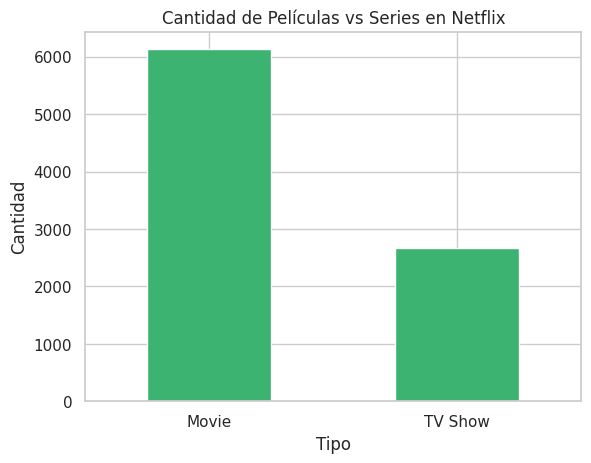

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual bonito
sns.set(style="whitegrid")

# Conteo de tipos
df['type'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Cantidad de Películas vs Series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.savefig('content_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


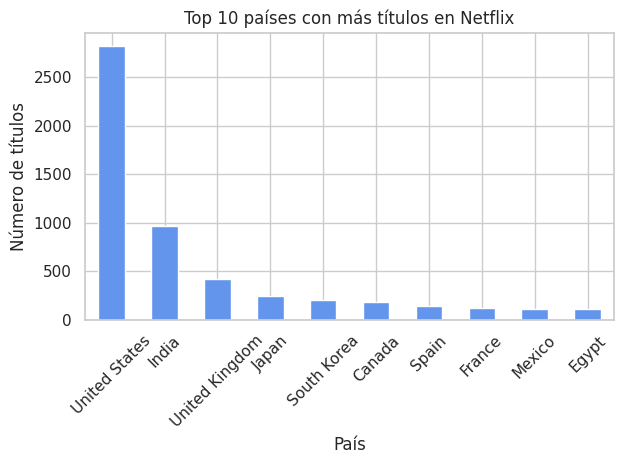

In [37]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 países con más títulos en Netflix')
plt.xlabel('País')
plt.ylabel('Número de títulos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_countries.png', dpi=300, bbox_inches='tight')
plt.show()


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


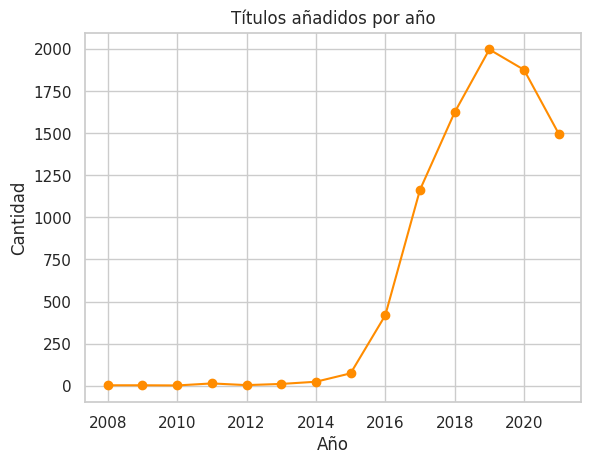

In [36]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='darkorange')
plt.title('Títulos añadidos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.savefig('titles_added_by_year.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [12]:
# Visualize missing values
df.isnull().mean().sort_values(ascending=False)


,0
director,0.299080
country,0.094357
cast,0.093675
date_added,0.011128
year_added,0.011128
rating,0.000454
duration,0.000341
show_id,0.000000
title,0.000000
type,0.000000


In [13]:
df.drop(columns=['director'], inplace=True)


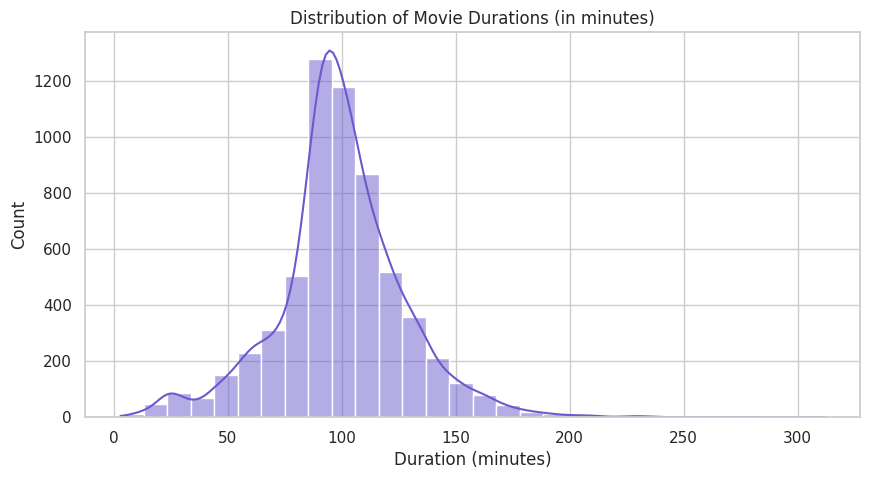

In [35]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration number
movies_df['duration_int'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(movies_df['duration_int'], bins=30, kde=True, color='slateblue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('movie_duration_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-34-2479541175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')


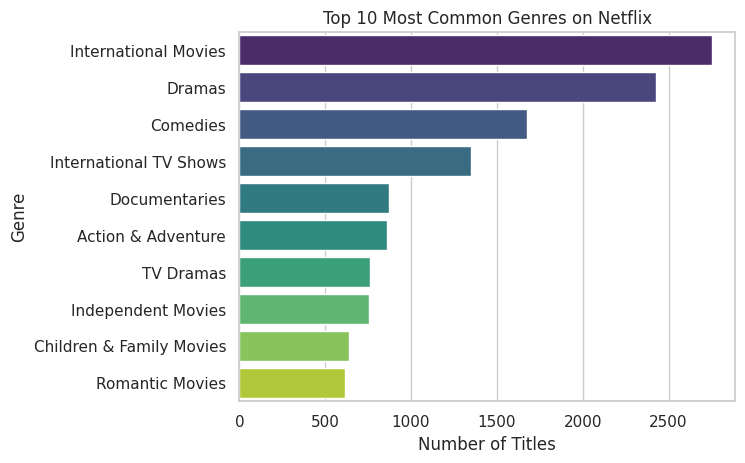

In [34]:
# Count most frequent genres (listed_in can contain multiple genres separated by commas)
from collections import Counter

genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres).most_common(10)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plot
sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.savefig('top_10_genres.png', dpi=300, bbox_inches='tight')
plt.show()


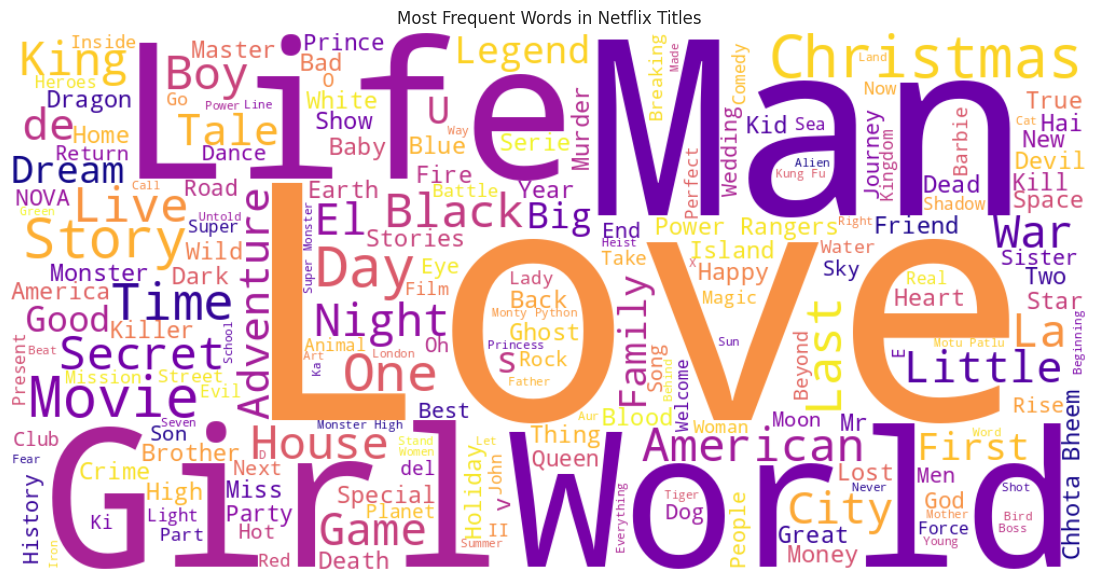

In [33]:
from wordcloud import WordCloud

# Combine all titles
text = ' '.join(df['title'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Netflix Titles')
plt.savefig('title_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
from google.colab import files

files.download('content_type_distribution.png')
files.download('top_10_countries.png')
files.download('titles_added_by_year.png')
files.download('movie_duration_distribution.png')
files.download('top_10_genres.png')
files.download('title_wordcloud.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>